<a href="https://colab.research.google.com/github/Fabian-Ra/NutriSynthCare_EDA/blob/main/NutriSynthCare_01_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🩺 NutriSynthCare – Análisis de Datos Clínicos Sintéticos
👤 **Autor:** fabian  
📅 **Fecha de inicio:** Julio 2025  
🎯 **Objetivo del proyecto:**  
Este proyecto busca aplicar técnicas de análisis de datos clínicos sobre datasets sintéticos con fines educativos. Incluye carga, limpieza, EDA, clasificación, agrupamiento y recomendaciones simples, utilizando Python y librerías estándar.

🧠 **Contexto:**  
Como estudiante de Análisis de Datos y con amplia experiencia previa en el área de la salud, este proyecto forma parte de mi portafolio profesional para mostrar habilidades prácticas en ciencia de datos.



In [ ]:
# 📦 Importar librerías necesarias para el análisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style='whitegrid')

print("Librerías cargadas correctamente.")

# 🎨 Estilo general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# 🎨 Configuración de visualización
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 8)



Librerías cargadas correctamente.


## 1️⃣ Carga del dataset

Lectura del archivo `db_cardiabetes.csv` desde Google Drive.


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/DATASETS_FULL/db_cardiabetes.csv")
df1.head()


,Año_Registro,Edad,IMC,Diabetes,Colesterol_Total,Trigliceridos,PAS,PAD,Cohorte,HbA1c,Insulina,LDL,HDL,Nivel_Estres,Actividad_Fisica,Riesgo_Cardiovascular,Sexo,Tipo_Diabetes
0,2016,53.0,30.464413,0,203.053597,228.381680,146.4,89.7,cardio,5.483777,10.602855,111.284292,71.456754,Alto,Moderado,Bajo,Hombre,No diabetes
1,2013,66.0,21.307639,0,214.198250,246.749168,151.8,87.2,cardio,5.212008,56.952216,124.064267,48.292897,Moderado,Sedentario,Bajo,Mujer,No diabetes
2,2017,68.0,32.672495,0,178.338545,214.823232,157.4,88.1,cardio,6.750564,92.875636,123.757918,55.659980,Moderado,Moderado,Bajo,Mujer,Diabetes latente
3,2014,60.0,41.167111,0,208.059981,242.028543,175.5,95.1,cardio,4.659614,188.637574,110.158158,54.487884,Moderado,Sedentario,Bajo,Mujer,Diabetes latente
4,2016,61.0,31.813888,1,260.781259,243.954935,164.6,93.9,cardio,7.436320,66.564019,120.410972,52.990636,Moderado,Sedentario,Riesgo Elevado,Mujer,Diabetes latente


## 2️⃣ Exploración inicial del dataset

Se analiza la estructura general del dataset `db_cardiabetes.csv`, incluyendo dimensiones, nombres de columnas, tipos de datos y estadísticas básicas.



In [ ]:
# 🔢 Dimensiones
print(f"Filas: {df1.shape[0]}")
print(f"Columnas: {df1.shape[1]}")

# 🧾 Columnas
print("\n📋 Columnas:")
print(df1.columns.tolist())

# ℹ️ Tipos de datos y nulos
print("\n🔍 Info general:")
df1.info()

# 📈 Estadísticas básicas
print("\n📊 Estadísticas numéricas:")
df1.describe().T



Filas: 15949
Columnas: 18

📋 Columnas:
['Año_Registro', 'Edad', 'IMC', 'Diabetes', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD', 'Cohorte', 'HbA1c', 'Insulina', 'LDL', 'HDL', 'Nivel_Estres', 'Actividad_Fisica', 'Riesgo_Cardiovascular', 'Sexo', 'Tipo_Diabetes']

🔍 Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15949 entries, 0 to 15948
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Año_Registro           15949 non-null  int64  
 1   Edad                   15949 non-null  float64
 2   IMC                    15949 non-null  float64
 3   Diabetes               15949 non-null  int64  
 4   Colesterol_Total       15949 non-null  float64
 5   Trigliceridos          15949 non-null  float64
 6   PAS                    15949 non-null  float64
 7   PAD                    15949 non-null  float64
 8   Cohorte                15949 non-null  object 
 9   HbA1c                  15949 no

,count,mean,std,min,25%,50%,75%,max
Año_Registro,15949.0,2014.508684,2.867333,2010.000000,2012.000000,2015.000000,2017.000000,2019.000000
Edad,15949.0,52.921751,11.027107,21.000000,46.000000,54.000000,61.000000,81.000000
IMC,15949.0,30.346443,5.757866,17.000000,25.800000,30.700000,34.600000,45.600000
Diabetes,15949.0,0.490438,0.499924,0.000000,0.000000,0.000000,1.000000,1.000000
Colesterol_Total,15949.0,219.928521,17.373652,140.916989,208.440000,219.880000,231.597555,293.177964
Trigliceridos,15949.0,192.850527,56.658680,90.000000,143.390000,182.410000,243.137337,300.000000
PAS,15949.0,149.655558,16.790990,99.000000,138.400000,151.300000,161.600000,194.600000
PAD,15949.0,91.494865,9.450460,64.300000,84.900000,92.400000,98.300000,116.700000
HbA1c,15949.0,6.384646,1.493556,3.500000,5.221616,6.241344,7.540000,11.370000
Insulina,15949.0,82.129949,56.597077,0.000000,34.954738,76.730000,124.270000,294.321897


## 3️⃣ Limpieza de datos

En esta sección se identifican y corrigen posibles problemas en el dataset, incluyendo duplicados, tipos de datos y valores extremos o inconsistentes.


Verificar valores nulos y duplicados

In [ ]:
# 🔍 Verificar valores nulos por columna
print("📌 Valores nulos por columna:")
print(df1.isnull().sum())

# 🧍‍♂️ Verificar registros duplicados
duplicados = df1.duplicated().sum()
print(f"\n🔁 Registros duplicados: {duplicados}")


📌 Valores nulos por columna:
Año_Registro             0
Edad                     0
IMC                      0
Diabetes                 0
Colesterol_Total         0
Trigliceridos            0
PAS                      0
PAD                      0
Cohorte                  0
HbA1c                    0
Insulina                 0
LDL                      0
HDL                      0
Nivel_Estres             0
Actividad_Fisica         0
Riesgo_Cardiovascular    0
Sexo                     0
Tipo_Diabetes            0
dtype: int64

🔁 Registros duplicados: 0


## 3️⃣ Limpieza de datos

Se revisa la presencia de valores nulos, duplicados y tipos de datos incorrectos.  
El dataset viene limpio, pero se verifica para asegurar su consistencia.


In [ ]:
# 📌 Nulos por columna
print("📌 Valores nulos por columna:")
print(df1.isnull().sum())

# 🔁 Duplicados
duplicados = df1.duplicated().sum()
print(f"\n🔁 Registros duplicados: {duplicados}")

# ✅ Conversión segura (opcional)
df1['Año_Registro'] = df1['Año_Registro'].astype(int)

# 📉 Rango de variables clave (verificación rápida)
columnas_clave = ['Edad', 'IMC', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD', 'HbA1c', 'Insulina']
df1[columnas_clave].agg(['min', 'max'])


📌 Valores nulos por columna:
Año_Registro             0
Edad                     0
IMC                      0
Diabetes                 0
Colesterol_Total         0
Trigliceridos            0
PAS                      0
PAD                      0
Cohorte                  0
HbA1c                    0
Insulina                 0
LDL                      0
HDL                      0
Nivel_Estres             0
Actividad_Fisica         0
Riesgo_Cardiovascular    0
Sexo                     0
Tipo_Diabetes            0
dtype: int64

🔁 Registros duplicados: 0


,Edad,IMC,Colesterol_Total,Trigliceridos,PAS,PAD,HbA1c,Insulina
min,21.0,17.0,140.916989,90.0,99.0,64.3,3.50,0.000000
max,81.0,45.6,293.177964,300.0,194.6,116.7,11.37,294.321897


### ✅ Resultados de la limpieza

- No se encontraron valores nulos en el dataset.
- No se detectaron registros duplicados.
- Los tipos de datos están correctos.
- Las variables numéricas clave se encuentran dentro de rangos plausibles.

El dataset está listo para el análisis exploratorio visual (EDA).


## 4️⃣ Análisis Exploratorio Visual (EDA)

Se visualizan las distribuciones de variables numéricas y categóricas para identificar patrones relevantes de salud y riesgo clínico.


Distribución de edad e IMC

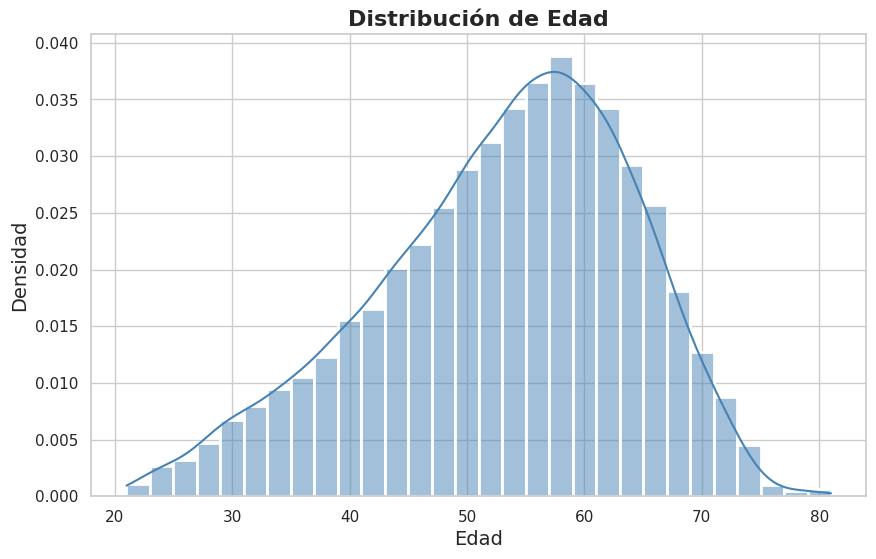

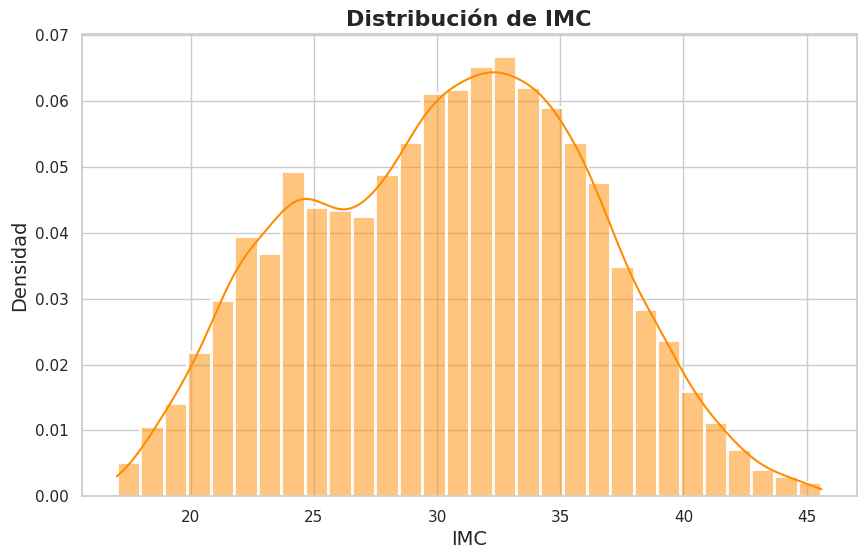

In [ ]:
# 📈 Distribución de Edad
plt.figure(figsize=(10, 6))
sns.histplot(df1['Edad'], kde=True, bins=30, color='steelblue', stat='density', linewidth=2)
plt.title("Distribución de Edad", fontsize=16, weight='bold')
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.grid(True)
plt.show()

# 📈 Distribución de IMC
plt.figure(figsize=(10, 6))
sns.histplot(df1['IMC'], kde=True, bins=30, color='darkorange', stat='density', linewidth=2)
plt.title("Distribución de IMC", fontsize=16, weight='bold')
plt.xlabel("IMC", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.grid(True)
plt.show()



Conteo de Diabetes y Sexo 👇

/tmp/ipython-input-7-2843246551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes', data=df1, palette='coolwarm', edgecolor='black')


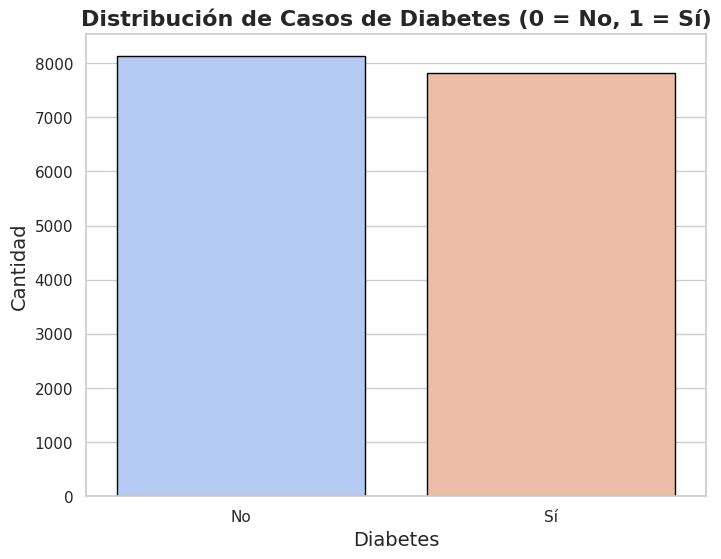

/tmp/ipython-input-7-2843246551.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sexo', data=df1, palette='Pastel1', edgecolor='black')


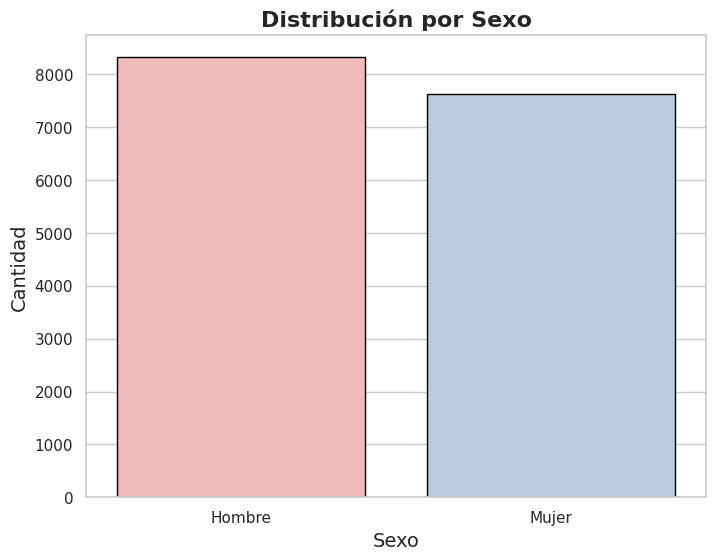

In [ ]:
# 📊 Casos de Diabetes
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes', data=df1, palette='coolwarm', edgecolor='black')
plt.title("Distribución de Casos de Diabetes (0 = No, 1 = Sí)", fontsize=16, weight='bold')
plt.xlabel("Diabetes", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


# 👤 Distribución por Sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='Sexo', data=df1, palette='Pastel1', edgecolor='black')
plt.title("Distribución por Sexo", fontsize=16, weight='bold')
plt.xlabel("Sexo", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.show()



Riesgo cardiovascular por sexo 👇

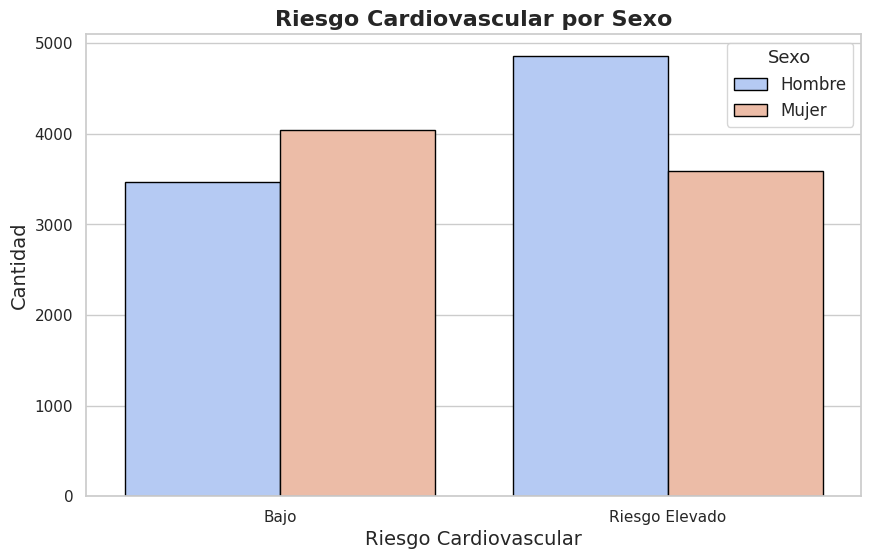

In [ ]:
# 📊 Riesgo Cardiovascular por Sexo
plt.figure(figsize=(10, 6))
sns.countplot(x='Riesgo_Cardiovascular', hue='Sexo', data=df1, palette='coolwarm', edgecolor='black')
plt.title("Riesgo Cardiovascular por Sexo", fontsize=16, weight='bold')
plt.xlabel("Riesgo Cardiovascular", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.legend(title="Sexo", title_fontsize=13, fontsize=12)
plt.show()



Boxplot IMC según Tipo de Diabetes 👇

/tmp/ipython-input-9-2621658882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo_Diabetes', y='IMC', data=df1, palette='Spectral', linewidth=2, fliersize=5)


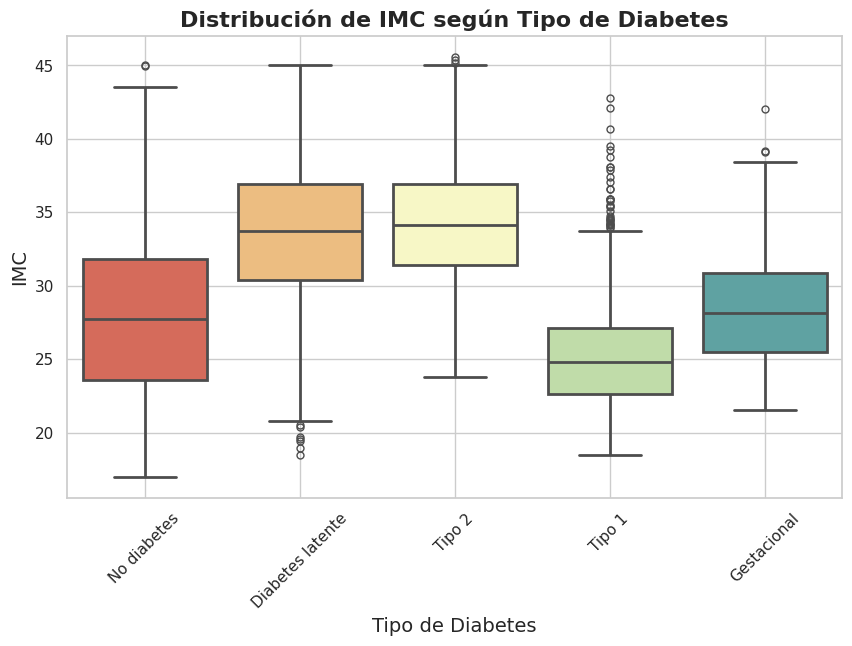

In [ ]:
# 📦 Boxplot IMC según Tipo de Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo_Diabetes', y='IMC', data=df1, palette='Spectral', linewidth=2, fliersize=5)
plt.title("Distribución de IMC según Tipo de Diabetes", fontsize=16, weight='bold')
plt.xlabel("Tipo de Diabetes", fontsize=14)
plt.ylabel("IMC", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



### 🔎 Observaciones EDA Mejoradas

- La **edad promedio** se concentra entre los **45 y 65 años**, con una ligera caída hacia los extremos.
- El **IMC** muestra alta frecuencia en valores de **25 a 35**, lo que indica sobrepeso y obesidad.
- La distribución de **sexo** es equilibrada entre hombres y mujeres.
- El **riesgo cardiovascular** parece estar más concentrado en **mujeres** que en hombres.
- Las personas con **diabetes latente** tienen un IMC más alto en comparación con aquellos sin diabetes.

Con estos gráficos obtenemos una visión más clara sobre la distribución de las variables clínicas.


## 5️⃣ Modelado Predictivo: Clasificación de Diabetes

Se entrena un modelo de regresión logística para predecir la presencia de diabetes a partir de variables clínicas seleccionadas.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Preparar datos (features y target)

In [ ]:
# 🎯 Variable objetivo
y = df1['Diabetes']

# 🧠 Variables predictoras numéricas (puedes ajustarlas)
X = df1[['Edad', 'IMC', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD', 'HbA1c', 'Insulina']]

# 🔀 División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Entrenar modelo

In [ ]:
# 📈 Crear y entrenar el modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# 🔍 Predicciones
y_pred = modelo.predict(X_test)


Evaluación del modelo

In [ ]:
# 🧪 Reporte y métricas
print("📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\n🔍 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print(f"\n✅ Precisión (accuracy): {accuracy_score(y_test, y_pred):.2f}")


📊 Matriz de Confusión:
[[1905  132]
 [ 192 1759]]

🔍 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2037
           1       0.93      0.90      0.92      1951

    accuracy                           0.92      3988
   macro avg       0.92      0.92      0.92      3988
weighted avg       0.92      0.92      0.92      3988


✅ Precisión (accuracy): 0.92


Visualización de la matriz de confusión

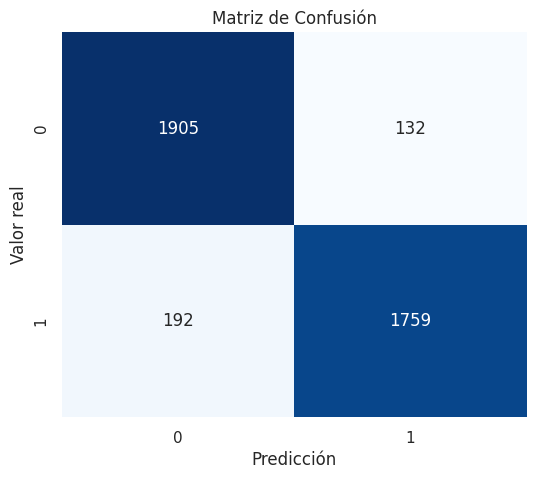

In [ ]:
# 🔲 Visualización de matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()


### 🧠 Resultados del modelo

- **Precisión del modelo**: 92 %
- El modelo presenta un **buen equilibrio** en la predicción de casos positivos (diabetes) y negativos.
- **Clase 0 (No diabetes)**:
  - *Precision* : 0.91
  - *Recall* : 0.94 → Excelente para evitar falsos negativos
- **Clase 1 (Diabetes)**:
  - *Precision* : 0.93
  - *Recall* : 0.90 → Muy buena para detectar casos reales




## 6️⃣ Agrupamiento de Pacientes con K-Means

Se utiliza el algoritmo de K-Means para agrupar pacientes según sus variables clínicas numéricas. Esto permite descubrir perfiles similares de salud para análisis o intervención.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# 📌 Variables numéricas para clustering
variables_cluster = ['Edad', 'IMC', 'Colesterol_Total', 'Trigliceridos', 'PAS', 'PAD', 'HbA1c', 'Insulina']

# 🎯 Escalado estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1[variables_cluster])


Encontrar número óptimo de clusters

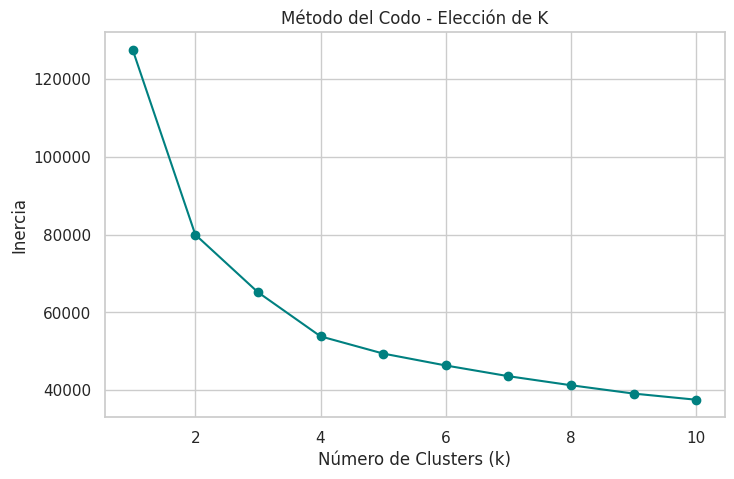

In [ ]:
# 📈 Método del codo
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-', color='teal')
plt.title("Método del Codo - Elección de K")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()


Entrenar modelo K-Means con k óptimo

In [ ]:
# 🧠 Elegimos k = 4 (puedes ajustarlo si lo ves en el gráfico)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# 🏷️ Añadir al dataset
df1['Cluster'] = clusters


Visualización 2D con PCA

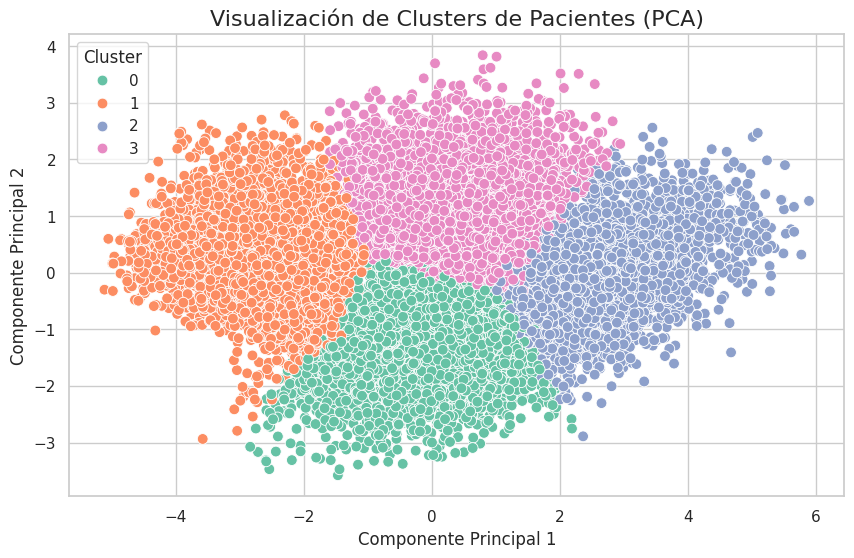

In [ ]:
# 📉 Reducción de dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# 🎨 Visualización de Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='Set2', s=60)
plt.title("Visualización de Clusters de Pacientes (PCA)", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Análisis por cluster

In [ ]:
# 📊 Resumen estadístico por cluster
df1.groupby('Cluster')[variables_cluster].mean().round(2)


,Edad,IMC,Colesterol_Total,Trigliceridos,PAS,PAD,HbA1c,Insulina
Cluster,,,,,,,,
0,57.07,29.46,206.46,223.42,152.42,93.07,5.27,57.15
1,42.51,23.47,212.68,126.48,127.54,78.91,6.03,31.44
2,62.11,35.48,232.99,256.21,168.69,102.09,6.82,124.90
3,49.70,33.38,229.95,162.68,150.34,92.13,7.61,120.97


## 🩺 Análisis de Clusters y Recomendaciones Clínicas

A continuación, se describe el perfil promedio de cada grupo de pacientes identificado con K-Means, junto con recomendaciones simples en base a su estado clínico general:

| Cluster | Perfil del Paciente (Promedios) | Interpretación Clínica | Recomendaciones Simples |
|--------|----------------------------------|--------------------------|--------------------------|
| **0** | Edad: 57 años, IMC: 29.4, Colesterol: 206, HbA1c: 5.2, Insulina: 57 | Perfil moderado, con signos de prediabetes o riesgo intermedio | 🥗 Reducir azúcares simples, 🏃 Actividad física regular, 🩺 Controles anuales |
| **1** | Edad: 42 años, IMC: 23.4, Colesterol: 212, HbA1c: 6.0, Insulina: 31 | Jóvenes en buen estado general, posible alerta temprana | ✅ Estilo de vida saludable, 🚭 Evitar tabaquismo, 🍓 Mantener peso saludable |
| **2** | Edad: 62 años, IMC: 35.4, Colesterol: 232, HbA1c: 6.8, Insulina: 124 | Perfil de alto riesgo metabólico | 🍽️ Reeducación alimentaria urgente, 🧘‍♂️ Manejo del estrés, 👨‍⚕️ Evaluación médica continua |
| **3** | Edad: 49 años, IMC: 33.3, Colesterol: 229, HbA1c: 7.6, Insulina: 120 | Pacientes posiblemente con diabetes ya presente | 💉 Control glicémico estricto, 🥦 Dieta baja en carbohidratos refinados, 👣 Revisiones mensuales |

> ⚠️ Estas recomendaciones no sustituyen atención médica real, pero ilustran cómo el análisis de datos puede apoyar decisiones clínicas.
